# Naive Bayes
In the following we will: 
- Train a Gaussian Naive Bayes (GaussianNB, https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique (see GridSearchCV )
- Train a Mixed Naive Bayes (MixedNB, https://pypi.org/project/mixed-naive-bayes/) model.
- Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.

The dataset I will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.

In [132]:
import pandas as pd
import numpy as np

In [133]:
df = pd.read_csv("travel-insurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [160]:
df.groupby(['TravelInsurance']).size()

,0
TravelInsurance,
0,1277
1,710


In [162]:
1277/(1277+710)

0.6426774031202819

In [135]:
df["Employment Type"].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [136]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [137]:
df_copy = df.copy()
data = pd.get_dummies(data=df_copy, columns=["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"], dtype=int)
data.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0


In [138]:
feature_names = data.columns.tolist()
feature_names.remove("TravelInsurance")

X = data[feature_names].values
y = data["TravelInsurance"].values

In [139]:
X.shape

(1987, 12)

## Gaussian Naive Bayes with Cross-validation

In [140]:
# Split the data into train/test and cv sets using sklearn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

SEED = 210158

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv_splits = list(cv.split(X_train, y_train))

### Non-Standardized

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

grid_search={"var_smoothing":np.logspace(0,-9, num=200)}
naive_model = GaussianNB()
naive_model_cv = GridSearchCV(naive_model, grid_search, cv=cv_splits, scoring = 'f1')

naive_model_cv.fit(X_train, y_train)

GridSearchCV(cv=[(array([   1,    2,    3, ..., 1586, 1587, 1588]),
                  array([   0,    6,   12,   30,   31,   32,   33,   38,   43,   52,   53,
         56,   63,   65,   67,   75,   88,   89,   94,   99,  104,  105,
        108,  116,  120,  126,  127,  128,  133,  136,  137,  140,  142,
        145,  149,  157,  159,  172,  173,  175,  188,  190,  207,  210,
        217,  218,  222,  227,  228,  229,  231,  232,  237,  242,  245,
        251,  254,  255,  258,  270,  273,  280,  287,  296,  300,  303,
        304,  311,  318,  320,  324,  326,  346,  352,  359,  362,  370,
        383,  3...
       1.09698580e-08, 9.88495905e-09, 8.90735464e-09, 8.02643352e-09,
       7.23263390e-09, 6.51733960e-09, 5.87278661e-09, 5.29197874e-09,
       4.76861170e-09, 4.29700470e-09, 3.87203878e-09, 3.48910121e-09,
       3.14403547e-09, 2.83309610e-09, 2.55290807e-09, 2.30043012e-09,
       2.07292178e-09, 1.86791360e-09, 1.68318035e-09, 1.51671689e-09,
       1.36671636e-09, 1.23155060e-09, 1.10975250e-09, 1.00000000e-09])},
             scoring='f1')

In [241]:
naive_model_cv.best_params_

{'var_smoothing': np.float64(0.23272024789604084)}

In [242]:
naive_model_cv.best_score_

np.float64(0.6029887848401726)

In [243]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
naive_predicted_label = naive_model_cv.predict(X_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(naive_predicted_label, y_test))
print(recall_score(naive_predicted_label, y_test))
print(f1_score(naive_predicted_label, y_test))
print(classification_report(naive_predicted_label, y_test))

0.5310344827586206
0.8369565217391305
0.6497890295358649
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       306
           1       0.53      0.84      0.65        92

    accuracy                           0.79       398
   macro avg       0.74      0.81      0.75       398
weighted avg       0.85      0.79      0.80       398



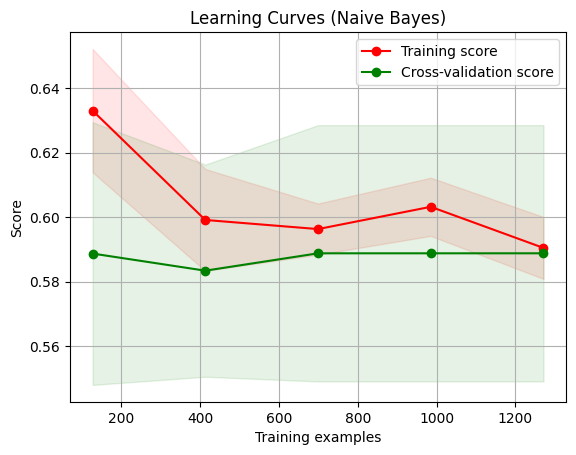

Training scores mean: [0.63303359 0.59910212 0.59627341 0.60318125 0.59042748]
Cross-validation scores mean: [0.58867655 0.58336479 0.58875521 0.58875521 0.58875521]
The model is underfitting (high bias).


In [244]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(naive_model, X_train, y_train, cv=cv_splits, scoring='f1')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Naive Bayes)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
				 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
				 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Interpretation
print("Training scores mean:", train_scores_mean)
print("Cross-validation scores mean:", test_scores_mean)

if train_scores_mean[-1] < 0.8 and test_scores_mean[-1] < 0.8:
	print("The model is underfitting (high bias).")
elif train_scores_mean[-1] > 0.9 and test_scores_mean[-1] < 0.8:
	print("The model is overfitting (high variance).")
else:
	print("The model has a good fit.")

### Standardized

In [ ]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

In [ ]:
X_normal_train.shape

(1589, 12)

In [ ]:
X_normal_test.shape

(398, 12)

In [232]:
grid_search={"var_smoothing":np.logspace(0,-9, num=200)}
naive_model_standardized = GaussianNB()
naive_model_cv_standardized = GridSearchCV(naive_model_standardized, grid_search, cv=cv_splits, scoring = 'f1')

naive_model_cv_standardized.fit(X_normal_train, y_train)

GridSearchCV(cv=[(array([   1,    2,    3, ..., 1586, 1587, 1588]),
                  array([   0,    6,   12,   30,   31,   32,   33,   38,   43,   52,   53,
         56,   63,   65,   67,   75,   88,   89,   94,   99,  104,  105,
        108,  116,  120,  126,  127,  128,  133,  136,  137,  140,  142,
        145,  149,  157,  159,  172,  173,  175,  188,  190,  207,  210,
        217,  218,  222,  227,  228,  229,  231,  232,  237,  242,  245,
        251,  254,  255,  258,  270,  273,  280,  287,  296,  300,  303,
        304,  311,  318,  320,  324,  326,  346,  352,  359,  362,  370,
        383,  3...
       1.09698580e-08, 9.88495905e-09, 8.90735464e-09, 8.02643352e-09,
       7.23263390e-09, 6.51733960e-09, 5.87278661e-09, 5.29197874e-09,
       4.76861170e-09, 4.29700470e-09, 3.87203878e-09, 3.48910121e-09,
       3.14403547e-09, 2.83309610e-09, 2.55290807e-09, 2.30043012e-09,
       2.07292178e-09, 1.86791360e-09, 1.68318035e-09, 1.51671689e-09,
       1.36671636e-09, 1.23155060e-09, 1.10975250e-09, 1.00000000e-09])},
             scoring='f1')

In [233]:
naive_model_cv_standardized.best_params_

{'var_smoothing': np.float64(0.9011018251665021)}

In [234]:
naive_model_cv_standardized.best_score_

np.float64(0.5861586994018547)

In [249]:
# Make prediction on the test data
naive_predicted_label_standardized = naive_model_cv_standardized.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(naive_predicted_label_standardized, y_test))
print(recall_score(naive_predicted_label_standardized, y_test))
print(f1_score(naive_predicted_label_standardized, y_test))
print(classification_report(naive_predicted_label_standardized, y_test))

0.5103448275862069
0.8409090909090909
0.6351931330472103
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       310
           1       0.51      0.84      0.64        88

    accuracy                           0.79       398
   macro avg       0.73      0.81      0.74       398
weighted avg       0.85      0.79      0.80       398



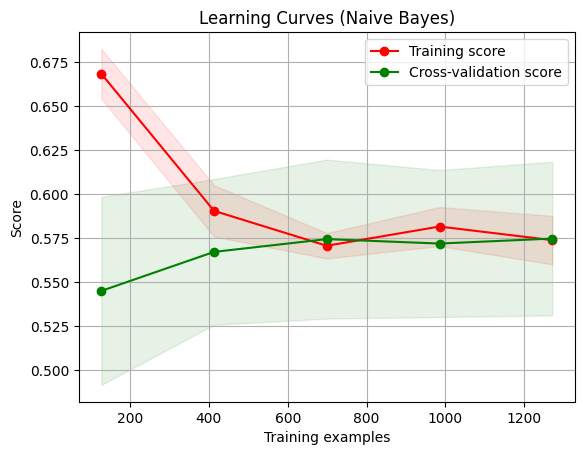

Training scores mean: [0.66843854 0.59056715 0.57074718 0.58166943 0.5739387 ]
Cross-validation scores mean: [0.54511618 0.56727071 0.57452165 0.57200359 0.57483659]
The model is underfitting (high bias).


In [236]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(naive_model_standardized, X_normal_train, y_train, cv=cv_splits, scoring='f1')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Naive Bayes)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
				 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
				 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Interpretation
print("Training scores mean:", train_scores_mean)
print("Cross-validation scores mean:", test_scores_mean)

if train_scores_mean[-1] < 0.8 and test_scores_mean[-1] < 0.8:
	print("The model is underfitting (high bias).")
elif train_scores_mean[-1] > 0.9 and test_scores_mean[-1] < 0.8:
	print("The model is overfitting (high variance).")
else:
	print("The model has a good fit.")

### Hyperparameter Testing: Priors

#### Non-Standardized: Verify priors=None

In [178]:
test_model = GaussianNB(priors = [1277/(1277+710), 1 - 1277/(1277+710)], **naive_model_cv.best_params_)
test_model.fit(X_train, y_train)

GaussianNB(priors=[0.6426774031202819, 0.3573225968797181],
           var_smoothing=np.float64(0.23101297000831597))

In [179]:
test_predicted_label = test_model.predict(X_test)

In [180]:
print(precision_score(test_predicted_label, y_test))
print(recall_score(test_predicted_label, y_test))
print(f1_score(test_predicted_label, y_test))

0.5310344827586206
0.8369565217391305
0.6497890295358649


In [181]:
print(classification_report(test_predicted_label, y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       306
           1       0.53      0.84      0.65        92

    accuracy                           0.79       398
   macro avg       0.74      0.81      0.75       398
weighted avg       0.85      0.79      0.80       398



#### Verify priors = None

In [185]:
test_model_standardized = GaussianNB(priors = [1277/(1277+710), 1 - 1277/(1277+710)], **naive_model_cv_standardized.best_params_)
test_model_standardized.fit(X_normal_train, y_train)

GaussianNB(priors=[0.6426774031202819, 0.3573225968797181],
           var_smoothing=np.float64(1.0))

In [186]:
test_predicted_label_standardized = test_model_standardized.predict(X_normal_test)

In [187]:
print(precision_score(test_predicted_label_standardized, y_test))
print(recall_score(test_predicted_label_standardized, y_test))
print(f1_score(test_predicted_label_standardized, y_test))

0.5103448275862069
0.8505747126436781
0.6379310344827587


In [188]:
print(classification_report(test_predicted_label_standardized, y_test))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       311
           1       0.51      0.85      0.64        87

    accuracy                           0.79       398
   macro avg       0.73      0.81      0.74       398
weighted avg       0.85      0.79      0.80       398



#### Test different prior assumptions

In [237]:
grid_search = {"var_smoothing":np.logspace(0,-9, num=200), "priors":[[0.6, 0.4], [1277/(1277+710), 1 - 1277/(1277+710)], [0.7, 0.3], [0.75, 0.25], [0.8, 0.2], [0.85, 0.15]]}
test_model_standardized_2 = GaussianNB()
test_model_cv_standardized_2 = GridSearchCV(test_model_standardized_2, grid_search, cv=cv_splits, scoring = 'f1')

test_model_cv_standardized_2.fit(X_normal_train, y_train)

GridSearchCV(cv=[(array([   1,    2,    3, ..., 1586, 1587, 1588]),
                  array([   0,    6,   12,   30,   31,   32,   33,   38,   43,   52,   53,
         56,   63,   65,   67,   75,   88,   89,   94,   99,  104,  105,
        108,  116,  120,  126,  127,  128,  133,  136,  137,  140,  142,
        145,  149,  157,  159,  172,  173,  175,  188,  190,  207,  210,
        217,  218,  222,  227,  228,  229,  231,  232,  237,  242,  245,
        251,  254,  255,  258,  270,  273,  280,  287,  296,  300,  303,
        304,  311,  318,  320,  324,  326,  346,  352,  359,  362,  370,
        383,  3...
       1.09698580e-08, 9.88495905e-09, 8.90735464e-09, 8.02643352e-09,
       7.23263390e-09, 6.51733960e-09, 5.87278661e-09, 5.29197874e-09,
       4.76861170e-09, 4.29700470e-09, 3.87203878e-09, 3.48910121e-09,
       3.14403547e-09, 2.83309610e-09, 2.55290807e-09, 2.30043012e-09,
       2.07292178e-09, 1.86791360e-09, 1.68318035e-09, 1.51671689e-09,
       1.36671636e-09, 1.23155060e-09, 1.10975250e-09, 1.00000000e-09])},
             scoring='f1')

In [238]:
test_model_cv_standardized_2.best_params_

{'priors': [0.7, 0.3], 'var_smoothing': np.float64(0.7316807143427196)}

In [245]:
test_model_cv_standardized_2.best_score_ #naive_model_cv_standardized.best_score_ = 0.5861586994018547

np.float64(0.5870193025302857)

In [246]:
test_predicted_label_standardized_2 = test_model_cv_standardized_2.predict(X_normal_test)

In [247]:
print(precision_score(test_predicted_label_standardized_2, y_test))
print(recall_score(test_predicted_label_standardized_2, y_test))
print(f1_score(test_predicted_label_standardized_2, y_test))

0.5103448275862069
0.8505747126436781
0.6379310344827587


In [248]:
print(classification_report(test_predicted_label_standardized_2, y_test))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       311
           1       0.51      0.85      0.64        87

    accuracy                           0.79       398
   macro avg       0.73      0.81      0.74       398
weighted avg       0.85      0.79      0.80       398



## Mixed Naive Bayes

In [154]:
# Install the library
!pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed_naive_bayes
from mixed_naive_bayes import MixedNB

  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-install-8t9fn2wj/mixed-naive-bayes_eb50a9b0a8f6461a924bc4fc721f2a23
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes /tmp/pip-install-8t9fn2wj/mixed-naive-bayes_eb50a9b0a8f6461a924bc4fc721f2a23
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done


In [155]:
clf = MixedNB(categorical_features=list(range(3,12,1)))
# We are fitting on non-standardized data, but we can also fit it on data where we only standardize numerical fraction of it.
clf.fit(X_train, y_train)
# We also cannot CV this because we cannot set hyperparameters for MixedNB

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [156]:
clf_predicted_label = clf.predict(X_test)

print(precision_score(clf_predicted_label, y_test))
print(recall_score(clf_predicted_label, y_test))
print(f1_score(clf_predicted_label, y_test))
print(classification_report(clf_predicted_label, y_test))

0.5310344827586206
0.7549019607843137
0.6234817813765182
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       296
           1       0.53      0.75      0.62       102

    accuracy                           0.77       398
   macro avg       0.72      0.76      0.73       398
weighted avg       0.81      0.77      0.78       398



### Compare

In [157]:
# Gaussian
print('Gaussian')
print(precision_score(naive_predicted_label, y_test))
print(recall_score(naive_predicted_label, y_test))
print(f1_score(naive_predicted_label, y_test))
print(classification_report(naive_predicted_label, y_test))

# Mixed
print('Mixed')
print(precision_score(clf_predicted_label, y_test))
print(recall_score(clf_predicted_label, y_test))
print(f1_score(clf_predicted_label, y_test))
print(classification_report(clf_predicted_label, y_test))

Gaussian
0.5310344827586206
0.8369565217391305
0.6497890295358649
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       306
           1       0.53      0.84      0.65        92

    accuracy                           0.79       398
   macro avg       0.74      0.81      0.75       398
weighted avg       0.85      0.79      0.80       398

Mixed
0.5310344827586206
0.7549019607843137
0.6234817813765182
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       296
           1       0.53      0.75      0.62       102

    accuracy                           0.77       398
   macro avg       0.72      0.76      0.73       398
weighted avg       0.81      0.77      0.78       398



## Remark



*   Standardized data perform worse than non-standardized data (maybe it is because we have categorical data)
*   Treating all features as continuous data yield higher result than taking into account for the categorical data into the model, which I do not understand why.
* All models are underfitting. I did tune/try out different prior probabilities for the GaussNB, but the model is still underfittin. Hence, this is rather the problem with Naive Bayes being too simple itself, not that there was insufficient tuning.
* Further possible experiments 1: try standardize only continuous data and fit it into models and see its behavior
* Further possible experiments 2: try cross-validation for MixedNB